Using device: cuda
Total images in dataset: 5640


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 208MB/s] 


Trainable params: 14932225


Epoch 1/10: 100%|██████████| 564/564 [02:18<00:00,  4.08it/s, loss=0.0584]


Epoch 1/10 Avg Loss: 0.058357
Validation MAE: 88.56


Epoch 2/10: 100%|██████████| 564/564 [02:19<00:00,  4.03it/s, loss=0.0189] 


Epoch 2/10 Avg Loss: 0.018864
Validation MAE: 117.22


Epoch 3/10: 100%|██████████| 564/564 [02:18<00:00,  4.06it/s, loss=0.016]  


Epoch 3/10 Avg Loss: 0.016010
Validation MAE: 122.45


Epoch 4/10: 100%|██████████| 564/564 [02:18<00:00,  4.07it/s, loss=0.0152] 


Epoch 4/10 Avg Loss: 0.015155
Validation MAE: 66.69


Epoch 5/10: 100%|██████████| 564/564 [02:18<00:00,  4.08it/s, loss=0.0148] 


Epoch 5/10 Avg Loss: 0.014754
Validation MAE: 97.48


Epoch 6/10: 100%|██████████| 564/564 [02:18<00:00,  4.08it/s, loss=0.0145] 


Epoch 6/10 Avg Loss: 0.014512
Validation MAE: 64.49


Epoch 7/10: 100%|██████████| 564/564 [02:19<00:00,  4.06it/s, loss=0.0143] 


Epoch 7/10 Avg Loss: 0.014318
Validation MAE: 181.06


Epoch 8/10: 100%|██████████| 564/564 [02:18<00:00,  4.08it/s, loss=0.0142] 


Epoch 8/10 Avg Loss: 0.014222
Validation MAE: 77.33


Epoch 9/10: 100%|██████████| 564/564 [02:19<00:00,  4.05it/s, loss=0.014]  


Epoch 9/10 Avg Loss: 0.014015
Validation MAE: 124.16


Epoch 10/10: 100%|██████████| 564/564 [02:19<00:00,  4.03it/s, loss=0.0139] 


Epoch 10/10 Avg Loss: 0.013936


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Validation MAE: 67.79
GT count: 1.00, Predicted count: 0.95


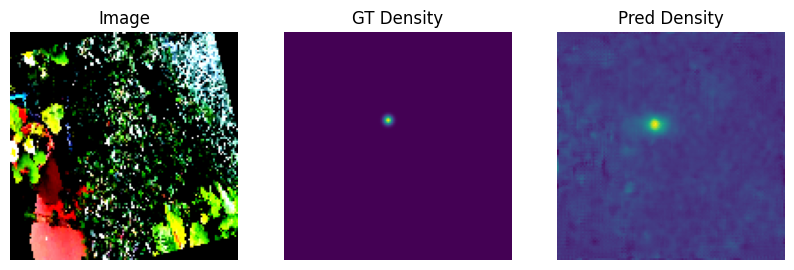

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 2.00, Predicted count: 1.30


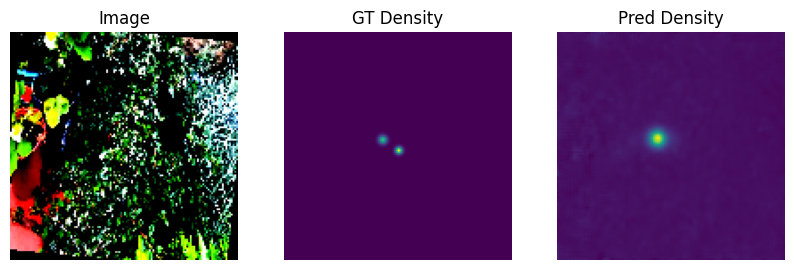

GT count: 1.00, Predicted count: 1.37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


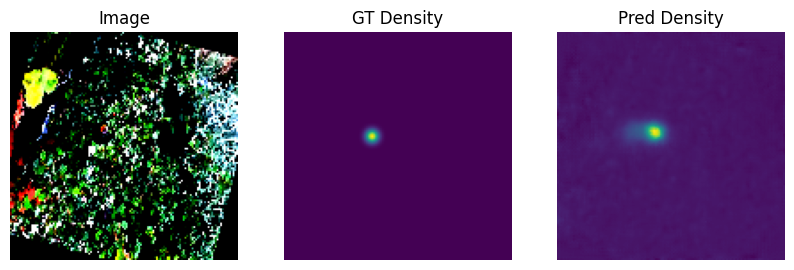

GT count: 1.00, Predicted count: 1.26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


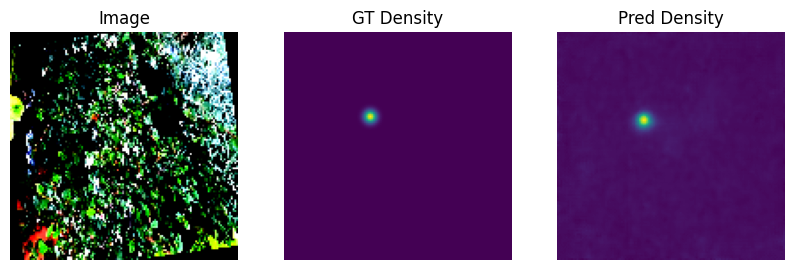

GT count: 1.00, Predicted count: 1.27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


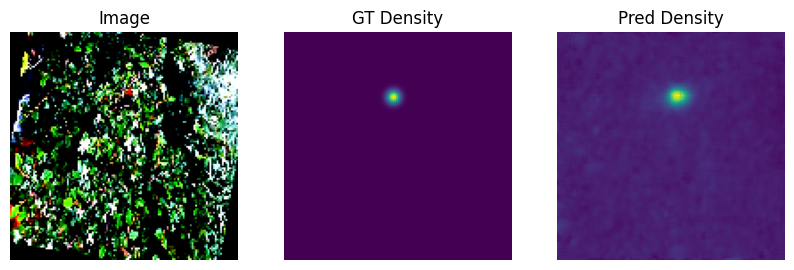

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 1.32


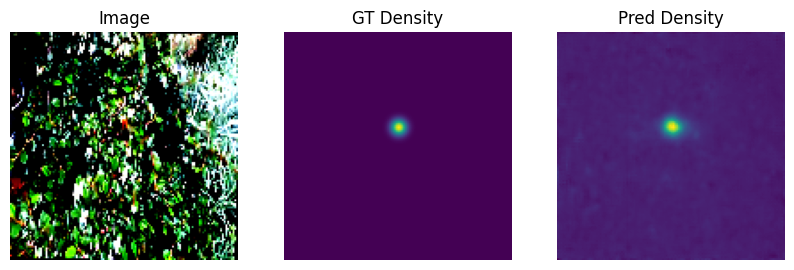

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 1.31


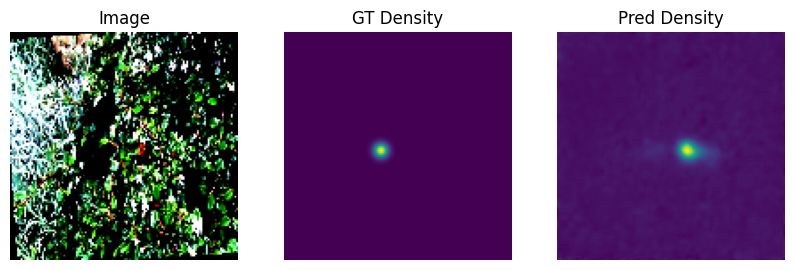

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 1.19


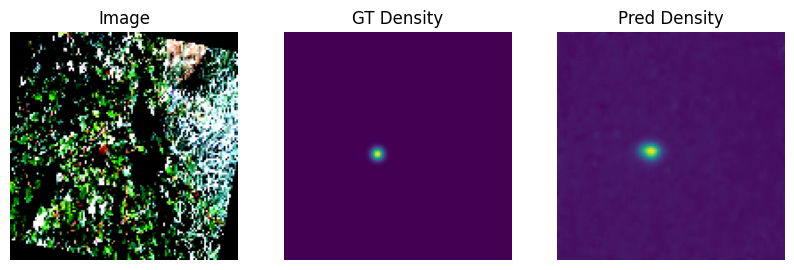

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.86


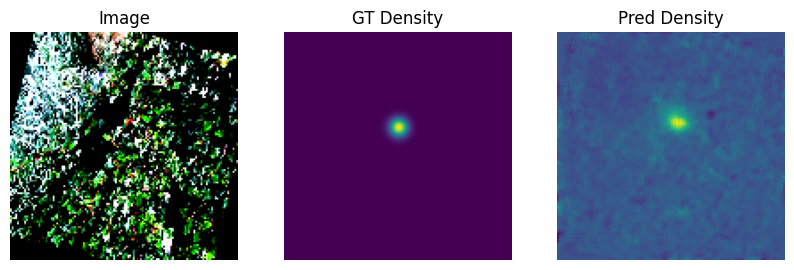

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.97


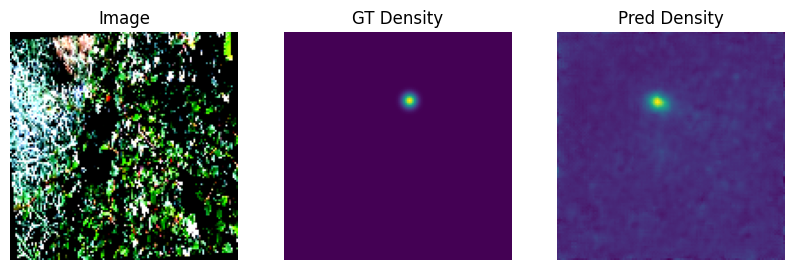

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 1.30


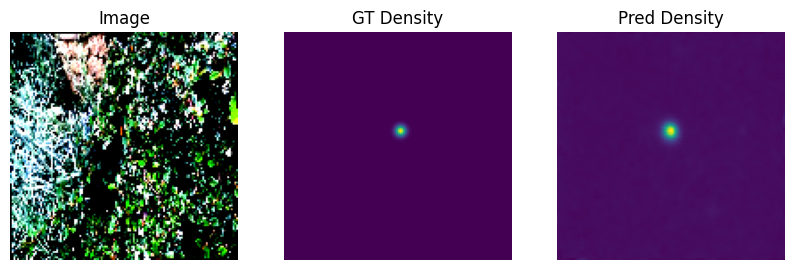

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 2.00, Predicted count: 1.52


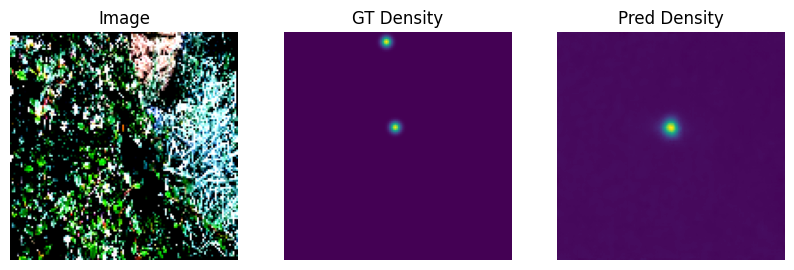

GT count: 1.00, Predicted count: 0.97


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


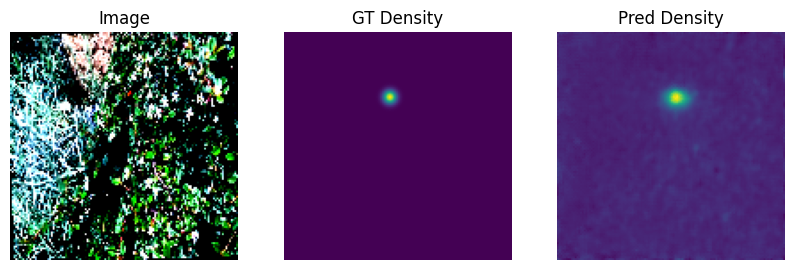

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.75


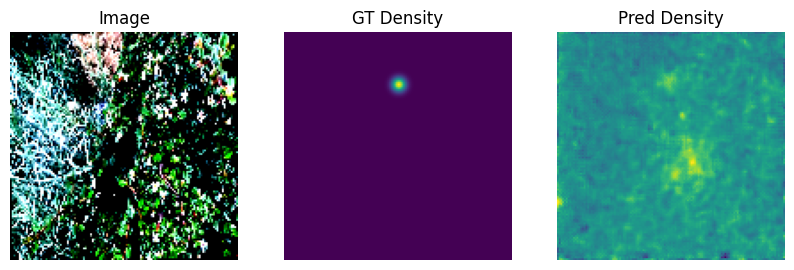

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 1.02


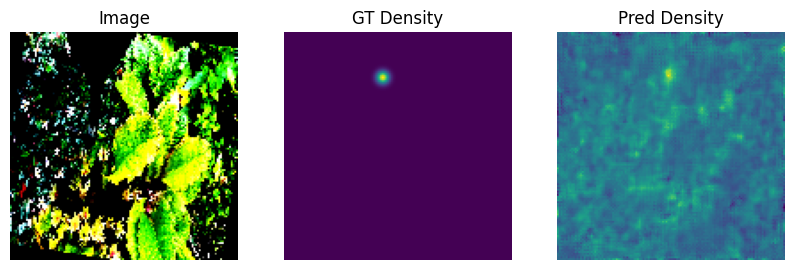

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.71


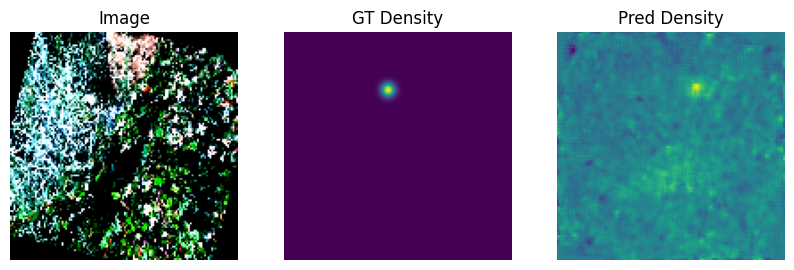

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.72


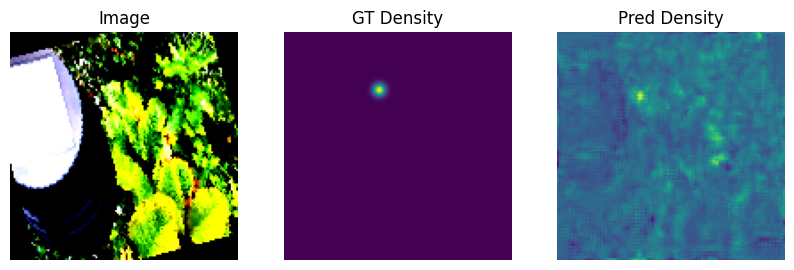

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.90


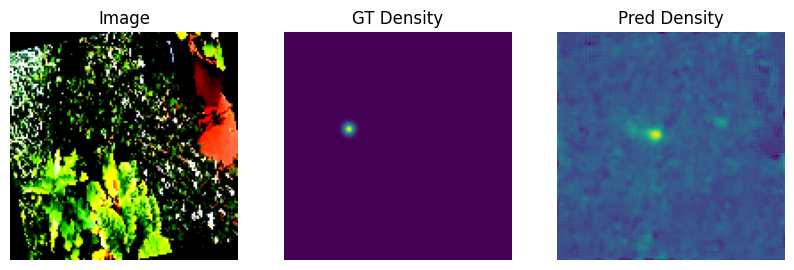

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 0.89


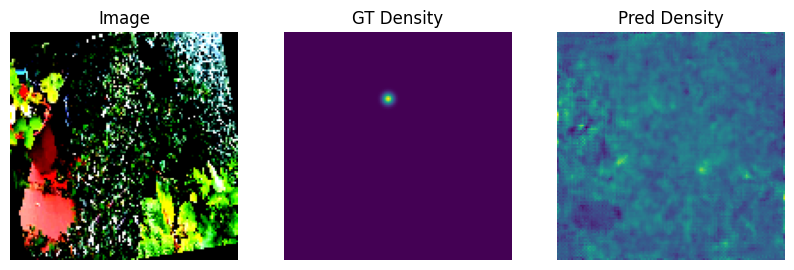

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GT count: 1.00, Predicted count: 2.01


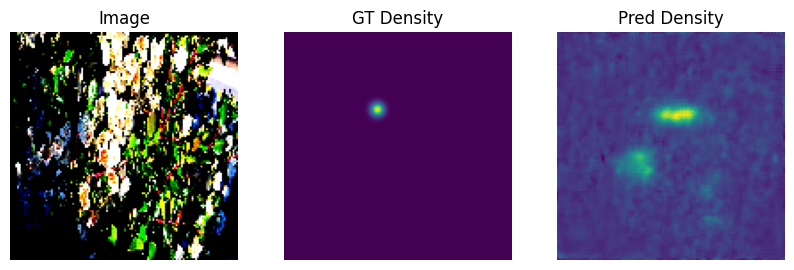

In [1]:
# -------------------------------
# vgg16_density_map_fixed_eval_fast.py (Patched for Bee Dataset - YOLO TXT)
# -------------------------------
import os
import cv2
import math
import random
import numpy as np
import xml.etree.ElementTree as ET
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.models as models
import torchvision.transforms as T
import torch.nn.functional as F

# -------------------------------
# Reproducibility
# -------------------------------
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)

# -------------------------------
# Gaussian kernel
# -------------------------------
def make_gaussian_kernel_numpy(sigma):
    # Compute kernel size — odd number ≥ 3
    k = int(max(3, math.ceil(sigma * 6)))
    if k % 2 == 0:
        k += 1

    # Create grid
    center = k // 2
    ax = np.arange(-center, center + 1, dtype=np.float32)
    xx, yy = np.meshgrid(ax, ax)

    # Gaussian formula
    denom = 2 * (sigma ** 2 + 1e-8)
    kernel = np.exp(-(xx * xx + yy * yy) / denom)

    # Normalize to ensure sum = 1
    kernel_sum = kernel.sum()
    if kernel_sum > 0:
        kernel /= kernel_sum

    return kernel.astype(np.float32)


def make_gaussian_kernel_torch(sigma,device):
    k = max(int(math.ceil(sigma*6)),3)
    if k%2==0: k+=1
    center = k//2
    ax = torch.arange(0,k,device=device,dtype=torch.float32)-float(center)
    xx,yy = torch.meshgrid(ax,ax,indexing="xy")
    kernel = torch.exp(-(xx**2+yy**2)/(2*(sigma**2+1e-8)))
    kernel /= kernel.sum()+1e-12
    return kernel

# -------------------------------
# ==== PATCHED DATASET (YOLO BEE DATASET) ====
# -------------------------------
class InsectDensityDataset(Dataset):
    def __init__(self, image_root, annot_root,
                 sigma=5, img_size=128, transform=None, augment=False,
                 use_gpu_kernels=True, min_images=50, scale_factor=100.0):

        self.sigma = sigma
        self.img_size = img_size
        self.transform = transform
        self.augment = augment
        self.use_gpu_kernels = use_gpu_kernels and torch.cuda.is_available()
        self.scale_factor = scale_factor

        # Images
        self.image_files = sorted(glob(os.path.join(image_root, "*.*")))

        self.images = []
        self.all_boxes = []

        for img_path in self.image_files:
            fname = os.path.basename(img_path)
            stem = os.path.splitext(fname)[0]
            txt_path = os.path.join(annot_root, stem + ".txt")

            if not os.path.exists(txt_path):
                continue

            img_cv = cv2.imread(img_path)
            if img_cv is None:
                continue
            orig_h, orig_w = img_cv.shape[:2]

            # Parse YOLO labels
            boxes = []
            with open(txt_path, "r") as f:
                for line in f:
                    cls, x, y, w, h = map(float, line.split())
                    cx = x * orig_w
                    cy = y * orig_h
                    bw = w * orig_w
                    bh = h * orig_h
                    boxes.append((cx, cy, bw, bh))

            self.images.append((img_path, orig_w, orig_h))
            self.all_boxes.append(boxes)

        # Oversample if too few
        while len(self.images) < min_images:
            self.images += self.images
            self.all_boxes += self.all_boxes

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, orig_w, orig_h = self.images[idx]
        boxes = self.all_boxes[idx]

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (self.img_size, self.img_size))

        scale_x = self.img_size / orig_w
        scale_y = self.img_size / orig_h

        scaled_centers = []
        scaled_boxes = []
        for (cx, cy, bw, bh) in boxes:
            scaled_centers.append((int(cx * scale_x), int(cy * scale_y)))
            scaled_boxes.append((cx * scale_x, cy * scale_y, bw * scale_x, bh * scale_y))

        # Density map
        density = np.zeros((self.img_size, self.img_size), dtype=np.float32)
        device = torch.device("cuda") if self.use_gpu_kernels else None

        if device is not None:
            density_torch = torch.zeros((self.img_size, self.img_size),
                                        device=device, dtype=torch.float32)

        for (x, y), (cx_s, cy_s, w_s, h_s) in zip(scaled_centers, scaled_boxes):

            if not (0 <= x < self.img_size and 0 <= y < self.img_size):
                continue

            box_size = max(1.0, (w_s + h_s) / 2.0)
            sigma = max(0.5, 0.4 * box_size)

            if device is not None:
                kernel = make_gaussian_kernel_torch(sigma, device)
                k_h, k_w = kernel.shape
                half_kh, half_kw = k_h // 2, k_w // 2

                x0 = x - half_kw
                y0 = y - half_kh
                ix0 = max(0, x0)
                iy0 = max(0, y0)
                ix1 = min(self.img_size, x + half_kw + 1)
                iy1 = min(self.img_size, y + half_kh + 1)

                kx0 = ix0 - x0
                ky0 = iy0 - y0
                kx1 = kx0 + (ix1 - ix0)
                ky1 = ky0 + (iy1 - iy0)

                density_torch[iy0:iy1, ix0:ix1] += kernel[ky0:ky1, kx0:kx1]

            else:
                kernel = make_gaussian_kernel_numpy(sigma)
                k_h, k_w = kernel.shape
                half_kh, half_kw = k_h // 2, k_w // 2

                x0 = x - half_kw
                y0 = y - half_kh
                ix0 = max(0, x0)
                iy0 = max(0, y0)
                ix1 = min(self.img_size, x + half_kw + 1)
                iy1 = min(self.img_size, y + half_kh + 1)

                kx0 = ix0 - x0
                ky0 = iy0 - y0
                kx1 = kx0 + (ix1 - ix0)
                ky1 = ky0 + (iy1 - iy0)

                density[iy0:iy1, ix0:ix1] += kernel[ky0:ky1, kx0:kx1]

        if device is not None:
            density = density_torch.detach().cpu().numpy()

        # Normalize density to count
        if len(scaled_centers) > 0:
            s = density.sum()
            if s > 0:
                density = density * (len(scaled_centers) / s)

        density *= self.scale_factor

        if self.transform:
            img_t = self.transform(img_resized)
        else:
            img_t = torch.from_numpy(img_resized.transpose(2, 0, 1)).float() / 255.0

        density_t = torch.from_numpy(density).unsqueeze(0).float()
        return img_t, density_t

# -------------------------------
# VGG16 Density Net (unchanged)
# -------------------------------
class VGG16DensityNet(nn.Module):
    def __init__(self,pretrained=True,target_size=128):
        super().__init__()
        self.target_size = target_size

        vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)
        self.encoder = nn.Sequential(*list(vgg.features)[:23])

        self.decoder_up = nn.ModuleList([
            nn.ConvTranspose2d(512,512,4,2,1),
            nn.ConvTranspose2d(512,256,4,2,1),
            nn.ConvTranspose2d(256,128,4,2,1),
            nn.ConvTranspose2d(128,64,4,2,1),
            nn.Conv2d(64,1,1)
        ])
        self.relu = nn.ReLU(inplace=True)

        self.skip_convs = nn.ModuleList([
            nn.Conv2d(512,512,1),
            nn.Conv2d(256,256,1),
            nn.Conv2d(128,128,1),
            nn.Conv2d(64,64,1)
        ])

    def forward(self,x):
        skips=[]
        for i,layer in enumerate(self.encoder):
            x = layer(x)
            if i in [4,9,16,22]:
                skips.append(x)
        skips = skips[::-1]

        for i in range(4):
            x = self.decoder_up[i](x)
            x = self.relu(x)
            s = F.interpolate(self.skip_convs[i](skips[i]),
                              size=x.shape[2:], mode='bilinear',
                              align_corners=False)
            x = x + s

        x = self.decoder_up[4](x)

        if x.shape[2]!=self.target_size or x.shape[3]!=self.target_size:
            x = F.interpolate(x,(self.target_size,self.target_size),
                              mode='bilinear',align_corners=False)
        return x

# -------------------------------
# Training + Validation
# -------------------------------
def train_model(model,dataloader,device,epochs=100,lr=1e-4):
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    criterion = nn.MSELoss()
    model.to(device)

    total_len = len(dataloader.dataset)
    train_len = int(0.8*total_len)
    val_len = total_len - train_len
    train_set, val_set = random_split(dataloader.dataset,[train_len,val_len])
    train_loader = DataLoader(train_set,batch_size=dataloader.batch_size,shuffle=False)
    val_loader = DataLoader(val_set,batch_size=dataloader.batch_size,shuffle=False)

    for epoch in range(epochs):
        model.train()
        epoch_loss=0.0
        loop = tqdm(train_loader,desc=f"Epoch {epoch+1}/{epochs}")
        for imgs,density in loop:
            imgs = imgs.to(device)
            density = density.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs,density)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            loop.set_postfix(loss=epoch_loss/len(train_loader))
        print(f"Epoch {epoch+1}/{epochs} Avg Loss: {epoch_loss/len(train_loader):.6f}")

        # Validation
        model.eval()
        mae=0.0
        with torch.no_grad():
            for imgs,density in val_loader:
                imgs = imgs.to(device)
                density = density.to(device)
                outputs = model(imgs)
                mae += torch.abs(outputs.sum(dim=[1,2,3])-density.sum(dim=[1,2,3])).sum().item()
            mae /= val_len
        print(f"Validation MAE: {mae:.2f}")

# -------------------------------
# Evaluation + Visualization
# -------------------------------
def evaluate_and_visualize(model,dataset,device,num_samples=30):
    model.eval()
    with torch.no_grad():
        for i in range(min(num_samples,len(dataset))):
            img_t,density_t = dataset[i]
            gt_count = density_t.sum().item()/dataset.scale_factor
            img_input = img_t.unsqueeze(0).to(device)
            pred_density = model(img_input)[0,0].cpu().numpy()/dataset.scale_factor
            pred_count = pred_density.sum()
            print(f"GT count: {gt_count:.2f}, Predicted count: {pred_count:.2f}")

            plt.figure(figsize=(10,4))
            plt.subplot(1,3,1)
            plt.imshow(img_t.permute(1,2,0).numpy())
            plt.title("Image")
            plt.axis("off")
            plt.subplot(1,3,2)
            plt.imshow(density_t[0].numpy()/dataset.scale_factor)
            plt.title("GT Density")
            plt.axis("off")
            plt.subplot(1,3,3)
            plt.imshow(pred_density)
            plt.title("Pred Density")
            plt.axis("off")
            plt.show()

# -------------------------------
# ==== PATCHED MAIN (Bee Dataset) ====
# -------------------------------
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    train_images = "/kaggle/input/bee-detection-dataset/train/images"
    train_labels = "/kaggle/input/bee-detection-dataset/train/labels"

    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
        T.RandomHorizontalFlip(),
        T.RandomRotation(15)
    ])

    dataset = InsectDensityDataset(
        image_root=train_images,
        annot_root=train_labels,
        sigma=5,
        img_size=128,
        transform=transform,
        augment=True,
        use_gpu_kernels=True
    )

    print("Total images in dataset:", len(dataset))

    dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

    model = VGG16DensityNet(pretrained=True)
    print("Trainable params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

    train_model(model, dataloader, device, epochs=10)

    evaluate_and_visualize(model, dataset, device, num_samples=20)

if __name__=="__main__":
    main()
